## **BERT**

Pertemuan sebelumnya telah dijelaskan sedikit banyak mengenai BERT, khususnya pada implementasi analisis sentimen. Selain analisis sentimen, model pre-trained BERT juga dapat digunakan pada kasus berikut:

1. **Text Classification**: BERT dapat digunakan untuk tugas-tugas klasifikasi teks seperti analisis sentimen, deteksi spam, dan klasifikasi dokumen. Model ini dapat dilatih untuk mengenali pola dan kategori dalam teks.
2. **Named Entity Recognition (NER)**: BERT sangat efektif untuk tugas-tugas pengenalan entitas bernama, yang melibatkan identifikasi nama orang, organisasi, lokasi, dan lainnya dalam teks.
3. **Question Answering (QA)**: Model BERT dapat digunakan untuk membangun sistem tanya jawab yang mampu memahami pertanyaan dan memberikan jawaban yang relevan dari teks yang diberikan.
4. **Text Summarization**: BERT dapat diterapkan dalam tugas ringkasan teks, baik untuk menghasilkan ringkasan ekstraktif (mengambil kalimat langsung dari teks) maupun abstraktif (menghasilkan ringkasan baru berdasarkan pemahaman konten).
5. **Paraphrase Detection**: BERT bisa digunakan untuk mendeteksi kalimat atau frasa yang memiliki arti yang sama atau mirip, berguna dalam aplikasi seperti plagiarisme dan duplikasi konten.
6. T**ext Generation**: Meskipun bukan tujuan utama BERT, model ini bisa diadaptasi untuk tugas generasi teks dengan menambahkan lapisan tambahan untuk menghasilkan teks berdasarkan konteks yang diberikan.
7. **Semantic Similarity**: BERT dapat digunakan untuk mengukur kesamaan semantik antara dua kalimat atau dokumen, yang penting dalam berbagai aplikasi seperti pencarian informasi dan penyaringan dokumen.
8. **Speech Recognition**: BERT juga bisa digunakan dalam tugas pengenalan suara, khususnya dalam memproses teks hasil transkripsi untuk pemahaman lebih lanjut dan tugas-tugas lanjutan.
9. **Chatbots dan Asisten Virtual**: BERT membantu dalam meningkatkan kemampuan pemahaman bahasa alami dari chatbots dan asisten virtual, membuat interaksi lebih alami dan efektif.

### **Text Classification**

BERT dapat dimanfaatkan untuk klasifikasi data teks, di mana prinsipnya hampir sama dengan analisis sentimen. Perlu diperhatikan bahwa model BERT yang sama bisa diperuntukkan pada lebih dari satu jenis tugas, namun perbedaan tugas tersebut disesuaikan dengan penggunaan method di masing-masing module yang digunakan. Dalam hal ini, digunakan module `Tensorflow` dengan method yang digunakan adalah `TFBertForSequenceClassification`. Sebelum dilakukan klasifikasi teks, terlebih dulu dilakukan tokenisasi data teks dengan menggunakan method `BertTokenizer`.

In [1]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import pandas as pd
from sklearn.model_selection import train_test_split

Model yang digunakan adalah model yang dikembangkan oleh Cahya yang terbaru, yaitu `bert-base-indonesian-1.5G`. Ketika mendefinisikan model, didefinisikan pula banyak label pada peubah respon, dalam hal ini ada 3.

In [2]:
MODEL_NAME = "cahya/bert-base-indonesian-1.5G"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/468 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/545M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-base-indonesian-1.5G and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Kemudian definisikan amatan yang digunakan, misalkan berikut. Dalam kasus real, bagian ini yang dilakukan perubahan menyesuaikan dengan data yang digunakan. Jika data berukuran besar bisa langsung di-import dalam format `pandas` (data frame).

In [4]:
data = {
    'sentence': [
        'Proyek Ibu Kota Nusantara bertujuan untuk mengurangi beban Jakarta yang semakin padat',
        'Banyak yang khawatir bahwa pembangunan besar-besaran akan merusak ekosistem di Kalimantan Timur',
        'Pemindahan ibu kota diharapkan dapat mendorong pemerataan pembangunan di Indonesia bagian timur',
        'Pendanaan untuk proyek ini menjadi tantangan besar yang harus diatasi pemerintah',
        'Warga lokal merasa khawatir dengan dampak sosial dan ekonomi dari proyek pemindahan ini',
        'Inisiatif ini mencerminkan visi Presiden Joko Widodo untuk masa depan Indonesia yang lebih baik',
        'Pembangunan infrastruktur dasar di Ibu Kota Nusantara sudah mulai terlihat progresnya',
        'Kritikus mempertanyakan apakah pemindahan ibu kota adalah solusi terbaik untuk masalah Jakarta',
        'Dengan konsep smart city dan green city, ibu kota baru ini diharapkan menjadi model kota masa depan',
        'Proyek ini membutuhkan dana yang sangat besar dan belum jelas semua sumber pendanaannya'
    ],
    'label': [2, 0, 2, 1, 0, 2, 1, 0, 2, 1]
}
df = pd.DataFrame(data)
df

,sentence,label
0,Proyek Ibu Kota Nusantara bertujuan untuk meng...,2
1,Banyak yang khawatir bahwa pembangunan besar-b...,0
2,Pemindahan ibu kota diharapkan dapat mendorong...,2
3,Pendanaan untuk proyek ini menjadi tantangan b...,1
4,Warga lokal merasa khawatir dengan dampak sosi...,0
5,Inisiatif ini mencerminkan visi Presiden Joko ...,2
6,Pembangunan infrastruktur dasar di Ibu Kota Nu...,1
7,Kritikus mempertanyakan apakah pemindahan ibu ...,0
8,"Dengan konsep smart city dan green city, ibu k...",2
9,Proyek ini membutuhkan dana yang sangat besar ...,1


Mendefinisikan fungsi yang digunakan untuk mengubah format data teks pada data latih dan uji sebagai data sampel. Langkah ini opsional tetapi secara proses dapat mempersingkat step.

In [5]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN):
    train_InputExamples = train.apply(lambda x: InputExample(guid=None,
                                                             text_a=x[DATA_COLUMN],
                                                             text_b=None,
                                                             label=x[LABEL_COLUMN]), axis=1)

    test_InputExamples = test.apply(lambda x: InputExample(guid=None,
                                                           text_a=x[DATA_COLUMN],
                                                           text_b=None,
                                                           label=x[LABEL_COLUMN]), axis=1)
    return train_InputExamples, test_InputExamples

Juga didefisikan fungsi untuk mengubah format dataframe ke bentuk data yang dibutuhkan dalam proses training yang bertipe tensor.

In [6]:
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = []
    for e in examples:
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length,
            pad_to_max_length=True,
            return_token_type_ids=True,
            return_attention_mask=True,
            truncation=True
        )
        input_ids, token_type_ids, attention_mask = input_dict["input_ids"], input_dict["token_type_ids"], input_dict["attention_mask"]

        features.append(
            InputFeatures(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label)
        )

    def gen():
        for f in features:
            yield ({
                'input_ids': f.input_ids,
                'attention_mask': f.attention_mask,
                'token_type_ids': f.token_type_ids
            }, f.label)

    return tf.data.Dataset.from_generator(gen,
                                          ({'input_ids': tf.int32,
                                            'attention_mask': tf.int32,
                                            'token_type_ids': tf.int32},
                                           tf.int64),
                                          ({'input_ids': tf.TensorShape([None]),
                                            'attention_mask': tf.TensorShape([None]),
                                            'token_type_ids': tf.TensorShape([None])},
                                           tf.TensorShape([])))

Dilakukan splitting data dengan proporsi data uji sebesar 20%.

In [7]:
train, test = train_test_split(df, test_size=0.2)

In [8]:
train_InputExamples, test_InputExamples = convert_data_to_examples(train, test, 'sentence', 'label')

In [9]:
train_InputExamples

8    InputExample(guid=None, text_a='Dengan konsep ...
0    InputExample(guid=None, text_a='Proyek Ibu Kot...
9    InputExample(guid=None, text_a='Proyek ini mem...
6    InputExample(guid=None, text_a='Pembangunan in...
3    InputExample(guid=None, text_a='Pendanaan untu...
7    InputExample(guid=None, text_a='Kritikus mempe...
4    InputExample(guid=None, text_a='Warga lokal me...
5    InputExample(guid=None, text_a='Inisiatif ini ...
dtype: object

In [10]:
test_InputExamples

1    InputExample(guid=None, text_a='Banyak yang kh...
2    InputExample(guid=None, text_a='Pemindahan ibu...
dtype: object

Jangan lupa data train dilakukan _shuffle_ untuk menghindari ketergantungan urutan antar amatan. Method `.batch()` disini digunakan untuk menentukan batch training, bisa didefinisikan ketika shuffling atau di dalam argumen compiling.

In [11]:
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(16).repeat(2)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [12]:
train_data

<_RepeatDataset element_spec=({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [13]:
test_data = convert_examples_to_tf_dataset(list(test_InputExamples), tokenizer)
test_data = test_data.batch(16)

In [14]:
test_data

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

Mendefinisikan optimizer, loss, dan metrik. Pemilihan optimizer dan metrik disesuaikan dengan tujuan analisis, sedangkan pemilihan loss sesuai dengan tipe data pada peubah respon.

In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

Selanjutnya dilakukan compiling, yaitu memasukkan elemen-elemen optimizer, loss, dan metric yang didefinisikan sebelumnya ke dalam model.

In [16]:
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

Setelah itu dilakukan fitting, di mana model yang sudah di-compile dijalankan pada data yang telah disiapkan sebelumnya dan sekaligus dilakukan validasi.

In [17]:
model.fit(train_data, epochs=2, validation_data=test_data)

Epoch 1/2


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 151s 14s/step - loss: 1.0710 - accuracy: 0.5625 - val_loss: 1.1418 - val_accuracy: 0.5000
Epoch 2/2
2/2 [==============================] - 1s 292ms/step - loss: 0.8419 - accuracy: 0.8125 - val_loss: 1.1699 - val_accuracy: 0.5000


Catatan: Line code di atas dieksekusi dalam waktu kurang lebih 2.5 menit.

### ***Named Encognity Recognition (NER)***

NER pada dasarnya mirip dengan teknik klasifikasi pada sentimen, namun bedanya setiap kata/term dalam kalimat diklasifikasikan ke dalam label yang berbeda. Jika dalam analisis sentimen satu amatan berupa satu kalimat yang diklasifikasikan ke dalam kelas sentimen tertentu, maka dalam NER setiap penggalan kata atau kata dalam kalimat yang diklasifikasikan ke dalam kelas kata tertentu. Sebagaimana pada analisis sebelumnya, baris kode diawali dengan import package dan module yang dibutuhkan.

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForTokenClassification
from transformers import create_optimizer
import numpy as np
import pandas as pd

In [ ]:
MODEL_NAME = "cahya/bert-base-indonesian-1.5G"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = TFBertForTokenClassification.from_pretrained(MODEL_NAME, num_labels=9)

All model checkpoint layers were used when initializing TFBertForTokenClassification.

Some layers of TFBertForTokenClassification were not initialized from the model checkpoint at cahya/bert-base-indonesian-1.5G and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Data dalam analisis ini dipecah dalam dua bagian, yaitu peubah penjelas yang mengandung kalimat, dan peubah respon yang berisi label list dari masing-masing kata dalam kalimat. Dalam hal ini, definisi masing-masing label sebagai berikut:
* O : Kata tidak termasuk dalam entitas apapun
* B-PER/I-PER : Kata dikategorikan sebagai entitas orang (person), B mewakili beginning/kata depan dan I mewakili inside/kata setelahnya
* B-ORG/I-ORG : Kata dikategorikan sebagai entitas organisasi tertentu
* B-LOC/I-LOC : Kata dikategorikan sebagai entitas lokasi
* B-MISC/I-MISC : Kata dikategorikan sebagai entitas _miscellaneous_ atau entitas ragam lainnya yang memiliki arti

In [ ]:
data = [
    ("Barack Obama adalah mantan presiden Amerika Serikat", ["B-PER", "I-PER", "O", "O", "O", "B-LOC", "I-LOC"]),
    ("Jakarta adalah ibu kota Indonesia", ["B-LOC", "O", "O", "O", "B-LOC"])
]

In [ ]:
df = pd.DataFrame(data, columns=["sentence", "labels"])
df

,sentence,labels
0,Barack Obama adalah mantan presiden Amerika Se...,"[B-PER, I-PER, O, O, O, B-LOC, I-LOC]"
1,Jakarta adalah ibu kota Indonesia,"[B-LOC, O, O, O, B-LOC]"


In [ ]:
tag2idx = {"O": 0, "B-PER": 1, "I-PER": 2, "B-ORG": 3, "I-ORG": 4, "B-LOC": 5, "I-LOC": 6, "B-MISC": 7, "I-MISC": 8}
idx2tag = {v: k for k, v in tag2idx.items()}
idx2tag

{0: 'O',
 1: 'B-PER',
 2: 'I-PER',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC',
 7: 'B-MISC',
 8: 'I-MISC'}

In [ ]:
max_len = 128
batch_size = 16

input_ids = []
attention_masks = []
labels = []

Selanjutnya dilakukan persiapan data dengan mengubah data sesuai dengan format yang diinginkan (tensor).

In [ ]:
def encode_sentence(sentence, tokenizer):
    tokens = tokenizer.tokenize(sentence)
    input_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = tokenizer.build_inputs_with_special_tokens(input_ids)
    return input_ids

In [ ]:
def align_labels(sentence, labels, tokenizer, max_len):
    tokenized_input = tokenizer.tokenize(sentence)
    aligned_labels = []
    for word, label in zip(sentence.split(), labels):
        word_tokens = tokenizer.tokenize(word)
        aligned_labels.extend([tag2idx[label]] + [tag2idx["O"]] * (len(word_tokens) - 1))
    return aligned_labels

In [ ]:
for sentence, label_seq in zip(df["sentence"], df["labels"]):
    encoded_sentence = encode_sentence(sentence, tokenizer)
    aligned_label_seq = align_labels(sentence, label_seq, tokenizer, max_len)

    padding_length = max_len - len(encoded_sentence)
    input_ids.append(encoded_sentence + [0] * padding_length)
    attention_masks.append([1] * len(encoded_sentence) + [0] * padding_length)
    labels.append(aligned_label_seq + [0] * (padding_length+2))

input_ids = np.array(input_ids)
attention_masks = np.array(attention_masks)
labels = np.array(labels)

In [ ]:
aligned_label_seq

[5, 0, 0, 0, 5]

In [ ]:
padding_length

121

In [ ]:
input_ids.shape

(2, 128)

In [ ]:
attention_masks.shape

(2, 128)

In [ ]:
labels.shape

(2, 128)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((input_ids, attention_masks, labels)).shuffle(len(df)).batch(batch_size)
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128), dtype=tf.int64, name=None), TensorSpec(shape=(None, 128), dtype=tf.int64, name=None), TensorSpec(shape=(None, 128), dtype=tf.int64, name=None))>

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
model.fit(train_dataset, epochs=3)

Epoch 1/3
1/1 [==============================] - 106s 106s/step - loss: 0.1976 - accuracy: 0.0273
Epoch 2/3
1/1 [==============================] - 4s 4s/step - loss: 0.0600 - accuracy: 0.0625
Epoch 3/3
1/1 [==============================] - 6s 6s/step - loss: 0.0155 - accuracy: 0.0625


### ***Question Answering (QA)***

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForQuestionAnswering
import numpy as np

Pada sistem QA, digunakan fungsi `TFBERTForQuestionAnswering`. Fungsi-fungsi lengkap TF untuk BERT dapat dilihat pada dokumentasi [berikut](https://huggingface.co/transformers/v2.10.0/model_doc/bert.html).

In [ ]:
MODEL_NAME = "cahya/bert-base-indonesian-1.5G"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = TFBertForQuestionAnswering.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/468 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/545M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForQuestionAnswering.

Some layers of TFBertForQuestionAnswering were not initialized from the model checkpoint at cahya/bert-base-indonesian-1.5G and are newly initialized: ['qa_outputs']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


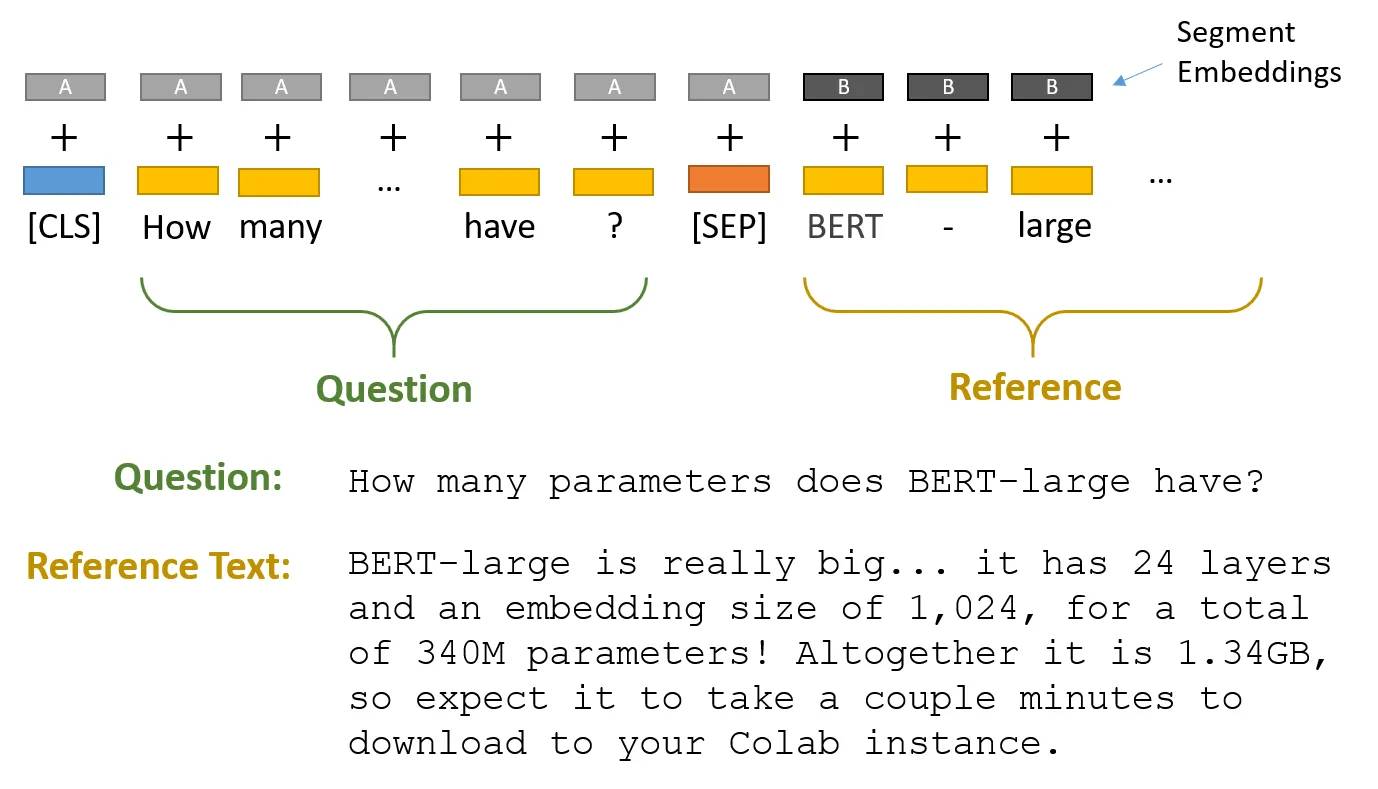

BERT menggunakan 2 jenis embeddings, yaitu token embeddings dan segment embeddings. Token embeddings digunakan untuk membedakan/sekat antar token, sedangkan segment embeddings untuk menyekat antara bagian pertanyaan dan jawaban.

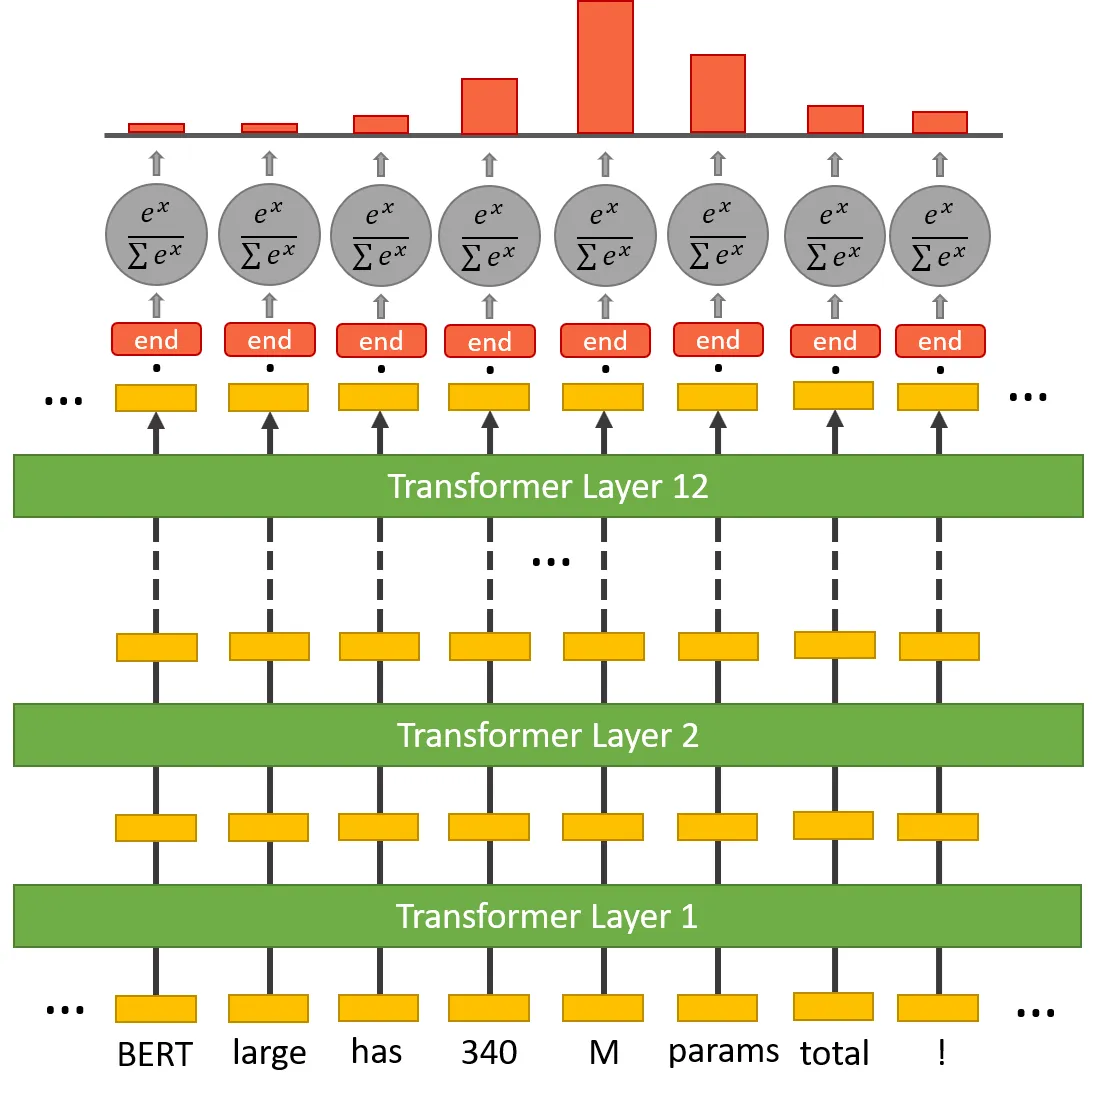

Setelah dilakukan embedding, dilakukan tokenisasi kata dan term weighting sehingga diperoleh probabilitas kata terbesar yang sering muncul berdasarkan fungsi softmax yang diperkirakan menjadi jawaban dari pertanyaan yang diberikan.

In [ ]:
# Example context and question
context = "Barack Obama adalah mantan presiden Amerika Serikat yang menjabat selama dua periode dari 2009 hingga 2017."
question = "Siapa Barack Obama?"

In [ ]:
inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="tf")
input_ids = inputs["input_ids"].numpy()[0]

In [ ]:
input_ids

array([    3,  6186, 22585, 14440,    32,     1, 22585, 14440,  1566,
        3651,  2601,  1948,  2202,  1510,  3127,  1977,  1887,  3001,
        1533,  2860,  1966,  3207,    17,     1], dtype=int32)

In [ ]:
outputs = model(inputs)
start_logits = outputs.start_logits
end_logits = outputs.end_logits

In [ ]:
end_logits

<tf.Tensor: shape=(1, 24), dtype=float32, numpy=
array([[ 0.08373056, -0.6100228 , -0.4081911 , -0.4132247 , -0.6076657 ,
         0.05414221,  0.46198633,  0.10155147, -0.22336996, -0.04246148,
        -0.27682272, -0.17320356,  0.11734597, -0.77947277, -0.04352894,
         0.04816986, -0.43410605, -0.18929377, -0.4544055 , -0.21966565,
        -0.677227  ,  0.00349769,  0.09828164,  0.4181592 ]],
      dtype=float32)>

In [ ]:
start_index = tf.argmax(start_logits, axis=1).numpy()[0]
end_index = tf.argmax(end_logits, axis=1).numpy()[0]

In [ ]:
start_index

4

In [ ]:
end_index

6

In [ ]:
answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[start_index:end_index + 1]))

In [ ]:
print(f"Question: {question}")
print(f"Answer: {answer}")

Question: Siapa Barack Obama?
Answer: ? [SEP] barack


### ***Text Summarization***

Kalau dalam code ini prinsipnya adalah seperti ringkasan ekstraktif di mana hanya mengambil kalimat penting. Kalimat penting ditandai dengan weight term antar  token tertinggi yang diekstrak. Dalam hal ini, token yang digunakan adalah sentence token (penggalan per kalimat).  

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import pipeline

In [ ]:
MODEL_NAME = "cahya/bert-base-indonesian-1.5G"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-base-indonesian-1.5G and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
text = """
Barack Obama adalah mantan presiden Amerika Serikat yang menjabat selama dua periode dari 2009 hingga 2017.
Selama masa jabatannya, ia berhasil mengesahkan Undang-Undang Perawatan Terjangkau, juga dikenal sebagai Obamacare.
Obama juga menerima Hadiah Nobel Perdamaian pada tahun 2009. Sebelum menjadi presiden, ia menjabat sebagai senator dari Illinois.
"""

In [ ]:
sentences = text.split('. ')
if sentences[-1] == '':
    sentences = sentences[:-1]

In [ ]:
sentences

['\nBarack Obama adalah mantan presiden Amerika Serikat yang menjabat selama dua periode dari 2009 hingga 2017',
 '\nSelama masa jabatannya, ia berhasil mengesahkan Undang-Undang Perawatan Terjangkau, juga dikenal sebagai Obamacare',
 '\nObama juga menerima Hadiah Nobel Perdamaian pada tahun 2009',
 'Sebelum menjadi presiden, ia menjabat sebagai senator dari Illinois.\n']

In [ ]:
inputs = tokenizer(sentences, return_tensors="tf", padding=True, truncation=True)
inputs

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'input_ids': <tf.Tensor: shape=(4, 21), dtype=int32, numpy=
array([[    3, 22585, 14440,  1566,  3651,  2601,  1948,  2202,  1510,
         3127,  1977,  1887,  3001,  1533,  2860,  1966,  3207,     1,
            2,     2,     2],
       [    3,  1977,  2073,  8145,    15,  1634,  2498, 16879,  3163,
           16,  3163,  7223, 18150,    15,  1609,  2106,  1600, 14440,
         4945,  1019,     1],
       [    3, 14440,  1609,  2998,  5866,  8709,  6114,  1535,  1582,
         2860,     1,     2,     2,     2,     2,     2,     2,     2,
            2,     2,     2],
       [    3,  1941,  1637,  2601,    15,  1634,  3127,  1600, 11791,
         1533, 14600,    17,     1,     2,     2,     2,     2,     2,
            2,     2,     2]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(4, 21), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 

In [ ]:
outputs = model(inputs)
predictions = tf.nn.softmax(outputs.logits, axis=-1)[:, 1]
predictions

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.51492083, 0.5065983 , 0.5578917 , 0.5285467 ], dtype=float32)>

In [ ]:
important_sentences = [sentences[i] for i in tf.argsort(predictions, direction='DESCENDING')[:3]]

In [ ]:
summary = '. '.join(important_sentences) + '.'

In [ ]:
print(f"Original Text: {text}")
print(f"Summary: {summary}")

Original Text: 
Barack Obama adalah mantan presiden Amerika Serikat yang menjabat selama dua periode dari 2009 hingga 2017. 
Selama masa jabatannya, ia berhasil mengesahkan Undang-Undang Perawatan Terjangkau, juga dikenal sebagai Obamacare. 
Obama juga menerima Hadiah Nobel Perdamaian pada tahun 2009. Sebelum menjadi presiden, ia menjabat sebagai senator dari Illinois.

Summary: 
Obama juga menerima Hadiah Nobel Perdamaian pada tahun 2009. Sebelum menjadi presiden, ia menjabat sebagai senator dari Illinois.
. 
Barack Obama adalah mantan presiden Amerika Serikat yang menjabat selama dua periode dari 2009 hingga 2017.


### ***Paraphrase Detection***

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import pandas as pd
import numpy as np

In [ ]:
MODEL_NAME = "cahya/bert-base-indonesian-1.5G"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-base-indonesian-1.5G and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
data = {
    'sentence1': [
        'Saya suka bermain sepak bola',
        'Buku itu sangat menarik'
    ],
    'sentence2': [
        'Saya senang bermain bola',
        'Buku itu membosankan'
    ],
    'label': [1, 0]
}
df = pd.DataFrame(data)

In [ ]:
def convert_data_to_examples(data, labels):
    return data.apply(lambda x: InputExample(guid=None,
                                             text_a=x['sentence1'],
                                             text_b=x['sentence2'],
                                             label=x['label']), axis=1)

In [ ]:
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = []

    for e in examples:
        input_dict = tokenizer.encode_plus(
            e.text_a, e.text_b, add_special_tokens=True, max_length=max_length, padding='max_length', truncation=True
        )
        input_ids, token_type_ids, attention_mask = input_dict["input_ids"], input_dict["token_type_ids"], input_dict["attention_mask"]
        features.append(InputFeatures(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label))

    def gen():
        for f in features:
            yield ({
                'input_ids': f.input_ids,
                'attention_mask': f.attention_mask,
                'token_type_ids': f.token_type_ids
            }, f.label)

    return tf.data.Dataset.from_generator(gen, ({'input_ids': tf.int32, 'attention_mask': tf.int32, 'token_type_ids': tf.int32}, tf.int64),
                                          ({'input_ids': tf.TensorShape([None]), 'attention_mask': tf.TensorShape([None]), 'token_type_ids': tf.TensorShape([None])}, tf.TensorShape([])))

In [ ]:
train_InputExamples = convert_data_to_examples(df, df['label'])
train_InputExamples

0    InputExample(guid=None, text_a='Saya suka berm...
1    InputExample(guid=None, text_a='Buku itu sanga...
dtype: object

In [ ]:
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(16).repeat(2)

In [ ]:
train_data

<_RepeatDataset element_spec=({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
model.fit(train_data, epochs=2)

Epoch 1/2


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 133s 8s/step - loss: 0.6666 - accuracy: 0.7500
Epoch 2/2
2/2 [==============================] - 8s 4s/step - loss: 0.4604 - accuracy: 1.0000


In [ ]:
def predict_paraphrase(sentence1, sentence2):
    inputs = tokenizer.encode_plus(sentence1, sentence2, add_special_tokens=True, return_tensors="tf", padding='max_length', truncation=True, max_length=128)
    predictions = model.predict({'input_ids': inputs['input_ids'], 'attention_mask': inputs['attention_mask'], 'token_type_ids': inputs['token_type_ids']})
    probs = tf.nn.softmax(predictions.logits, axis=-1)
    return np.argmax(probs, axis=1)[0]

In [ ]:
sentence1 = "Saya suka bermain sepak bola"
sentence2 = "Saya senang bermain bola"

In [ ]:
print(f"Are the sentences paraphrases? {'Yes' if predict_paraphrase(sentence1, sentence2) == 1 else 'No'}")

1/1 [==============================] - 13s 13s/step
Are the sentences paraphrases? Yes


### ***Semantic Similarity***

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

In [ ]:
MODEL_NAME = "cahya/bert-base-indonesian-1.5G"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-base-indonesian-1.5G and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
MODEL_NAME = "cahya/bert-base-indonesian-1.5G"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at cahya/bert-base-indonesian-1.5G and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
data = {
    'sentence1': [
        'Saya suka bermain sepak bola',
        'Hujan membuat tanah menjadi basah'
    ],
    'sentence2': [
        'Saya sering bermain bola di lapangan',
        'Air hujan membuat tanah menjadi lembut'
    ],
    'label': [1, 0]  # 1: Similar, 0: Not similar
}
df = pd.DataFrame(data)

In [ ]:
def convert_data_to_examples(data, labels):
    return data.apply(lambda x: InputExample(guid=None,
                                             text_a=x['sentence1'],
                                             text_b=x['sentence2'],
                                             label=x['label']), axis=1)

In [ ]:
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = []

    for e in examples:
        input_dict = tokenizer.encode_plus(
            e.text_a, e.text_b, add_special_tokens=True, max_length=max_length, padding='max_length', truncation=True
        )
        input_ids, token_type_ids, attention_mask = input_dict["input_ids"], input_dict["token_type_ids"], input_dict["attention_mask"]
        features.append(InputFeatures(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label))

    def gen():
        for f in features:
            yield ({
                'input_ids': f.input_ids,
                'attention_mask': f.attention_mask,
                'token_type_ids': f.token_type_ids
            }, f.label)

    return tf.data.Dataset.from_generator(gen, ({'input_ids': tf.int32, 'attention_mask': tf.int32, 'token_type_ids': tf.int32}, tf.int64),
                                          ({'input_ids': tf.TensorShape([None]), 'attention_mask': tf.TensorShape([None]), 'token_type_ids': tf.TensorShape([None])}, tf.TensorShape([])))

In [ ]:
train_InputExamples = convert_data_to_examples(df, df['label'])
train_InputExamples

0    InputExample(guid=None, text_a='Saya suka berm...
1    InputExample(guid=None, text_a='Hujan membuat ...
dtype: object

In [ ]:
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(16).repeat(2)
train_data

<_RepeatDataset element_spec=({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, None), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
model.fit(train_data, epochs=2)

Epoch 1/2
2/2 [==============================] - 98s 7s/step - loss: 0.6687 - accuracy: 0.5000
Epoch 2/2
2/2 [==============================] - 10s 6s/step - loss: 0.3488 - accuracy: 1.0000


In [ ]:
def predict_similarity(sentence1, sentence2):
    inputs = tokenizer.encode_plus(sentence1, sentence2, add_special_tokens=True, return_tensors="tf", padding='max_length', truncation=True, max_length=128)
    predictions = model.predict({'input_ids': inputs['input_ids'], 'attention_mask': inputs['attention_mask'], 'token_type_ids': inputs['token_type_ids']})
    probs = tf.nn.softmax(predictions.logits, axis=-1)
    return probs.numpy()[0][1]

In [ ]:
sentence1 = "Saya suka bermain sepak bola"
sentence2 = "Saya sering bermain bola di lapangan"
print(f"Similarity between sentences: {predict_similarity(sentence1, sentence2)}")

1/1 [==============================] - 12s 12s/step
Similarity between sentences: 0.8706682920455933
